# Compile with the following OPTIONS File:

*# Options for compiling*<br>
**SHELL = /bin/bash**

*# Choose the COMPILER*<br>
**COMPILER = ifort**

*# Choose the Linear Algebra libraries*<br>
**LINALG = MKL**

*# Do you use DEBUG or Optimization Mode? (DEBUG/OPT)*<br>
**MODE = OPT**

*# Turn on omp or mpi (enter TRUE .or. FALSE)?*<br>
**OPENMP = FALSE**<br>
**MPI = FALSE**

*# Choose the MACHINE file*<br>
**MACHINE = HKQAI**

*# Choose HORSFIELD or McWEDA*<br>
**THEORY = McWEDA**

*# Choose HARRIS, DOGS, or KS (Kohn-Sham)*<br>
*# Note that the KS code only does LDA for now as it uses McWEDA routines.*<br> 
**SCF = DOGS**

*# Choose the DIAGONALIZATION Method - GAMMAD (divide and conquer),*<br>
*# KPOINTS, or MDET (also GAMMA) - Default is GAMMA*<br>
**DIAGONALIZATION = KPOINTS**

*# Choose the XC functional*<br>
**XC = LDA**


## Preparation

In [1]:
!cd ~/thunder2022/lightning/tests/02.TiO2

In [2]:
# link the Fdata
!ln -s ~/thunder2022/datafiles/Fdata-McWEDA-0.15-3SN.Hs3.75.Os3.35p3.80-3SNP.Tis5.80p6.20d5.40 Fdata

ln: failed to create symbolic link 'Fdata/Fdata-McWEDA-0.15-3SN.Hs3.75.Os3.35p3.80-3SNP.Tis5.80p6.20d5.40': File exists


In [3]:
import os
import sys
import ase
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from benchmark_tools.benchmark import Benchmark
from ase.io import read as aseread
from ase.build import bulk
from imageio.v2 import imread

## Set Plotting Arguments

In [5]:
mpl.rcParams.update({
    'font.size': 32,
    'font.weight' : "regular",
    #'axes.labelweight' : "bold",
    'figure.figsize': (16,12),
    'font.family': "serif",
    #'font.serif': ['cm10'],                   
    'text.usetex': True,
    #'text.latex.preamble': [r'\boldmath'],
    #'mathtext.default' : 'regular',
    #'font.sans-serif': ["DejaVu Sans"], 
    'axes.linewidth' : 2,
    'lines.linewidth' : 2,
    })

# TiO2 - Rutile

## Set benchmark systems

In [6]:
kwargs_update_scf = { 'kpt_size': [7, 7, 11], }
kwargs_update_eos = { 'kpt_size': [7, 7, 11], }

bm_McWEDA = Benchmark(
#       mp_apikey = "R2rD2kAJuqQq5Xk7m66gt0unrcVAVsVY",
#       mater_id = "mp-2657",
        structure_inpf="/users/lewis/thunder2022/lightning/tests/02.TiO2/rutile.poscar",
        structure_fmt="vasp",
        firerun = '/users/lewis/thunder2022/lightning/tests/02.TiO2/lightning.x',
        Fdata_path = '/users/lewis/thunder2022/lightning/tests/02.TiO2/Fdata',
        work_path = '/users/lewis/thunder2022/lightning/tests/02.TiO2',
        )

## Plot Brillouin zone

Cell from bench import:  Cell([[4.59983732388071, 0.0, 3e-16], [7e-16, 4.59983732388071, 3e-16], [0.0, 0.0, 2.959213560001133]])
TET(a=4.59984, c=2.95921)
  Variant name: TET
  Special point names: GAMRXZ
  Default path: GXMGZRAZ,XR,MA

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    A   0.5000  0.5000  0.5000
    M   0.5000  0.5000  0.0000
    R   0.0000  0.5000  0.5000
    X   0.0000  0.5000  0.0000
    Z   0.0000  0.0000  0.5000



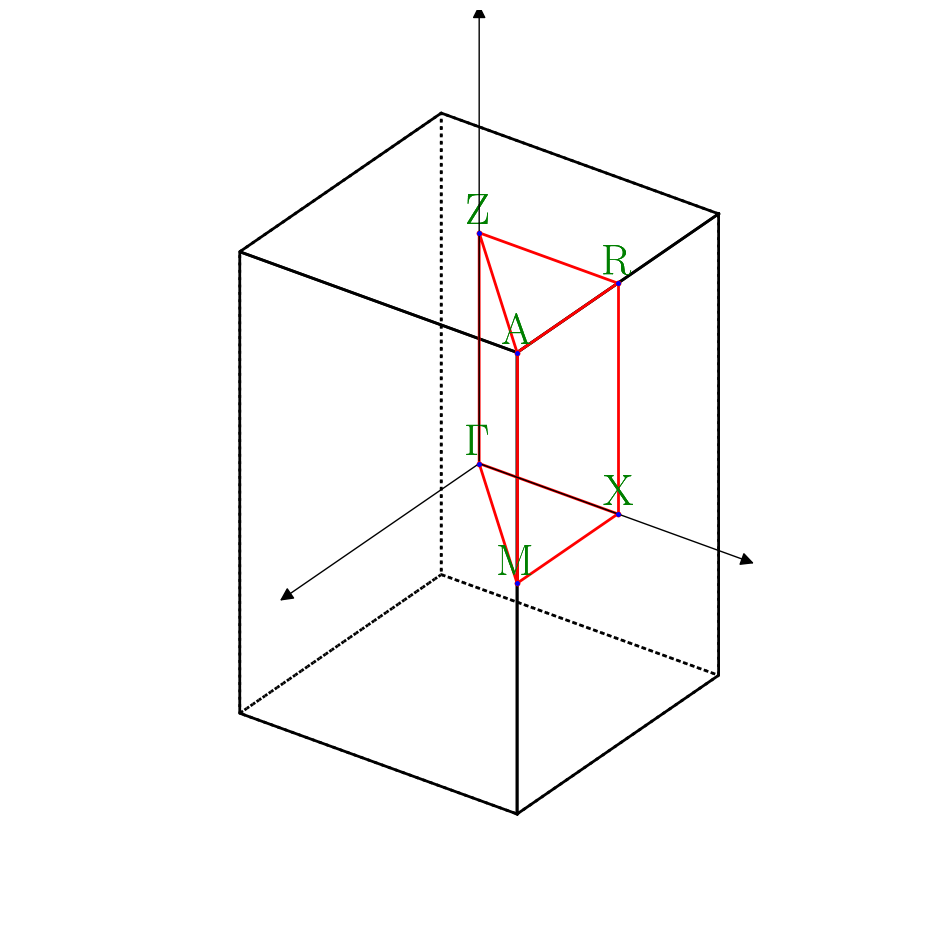

<Axes3DSubplot: >

In [7]:
atoms = bm_McWEDA.ase_atoms
print("Cell from bench import: ", atoms.cell)
lat = atoms.cell.get_bravais_lattice()
print(lat.description())
lat.plot_bz(show=True)

## Calculate and plot band structure

  LIGHTNING RUNTIME :    15.5065460000000      [sec] 
  LIGHTNING RUNTIME :    4.95387200000000      [sec] 
Gap: 3.413 eV
Transition (v -> c):
  (s=0, k=107, n=15, [0.05, 0.05, 0.00]) -> (s=0, k=135, n=16, [0.68, 0.68, 0.00])


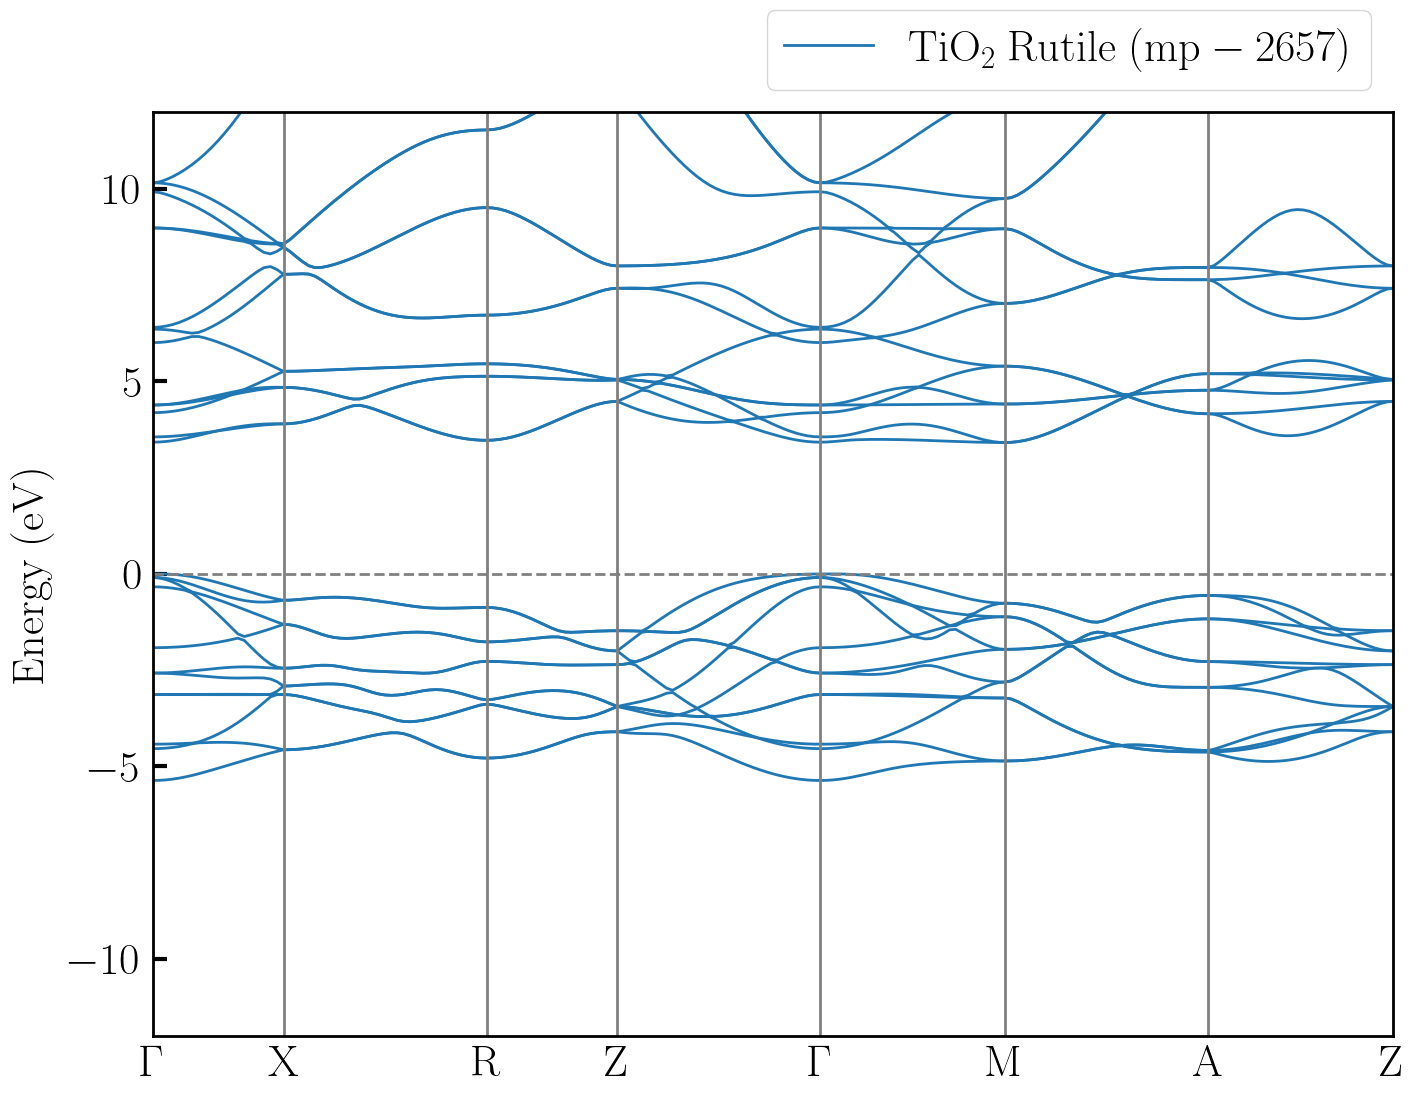

In [8]:
energy_range = (-12., 12.)

bm_McWEDA.scf(kwargs_update_scf)
bm_McWEDA.calc_band(path ="GXRZGMAZ",npoints = 200,fermi_ref = 'cbmax')

ax_band = bm_McWEDA.plot_band(energy_range = energy_range, 
                              replace_kpoint_labels = {'G':'$\Gamma$',},
                              color='C0',
                              label='$\mathrm{TiO_{2} \; Rutile \; (mp-2657)}$')
bm_McWEDA.savefig_band('bandstructure_mp-2657.png')

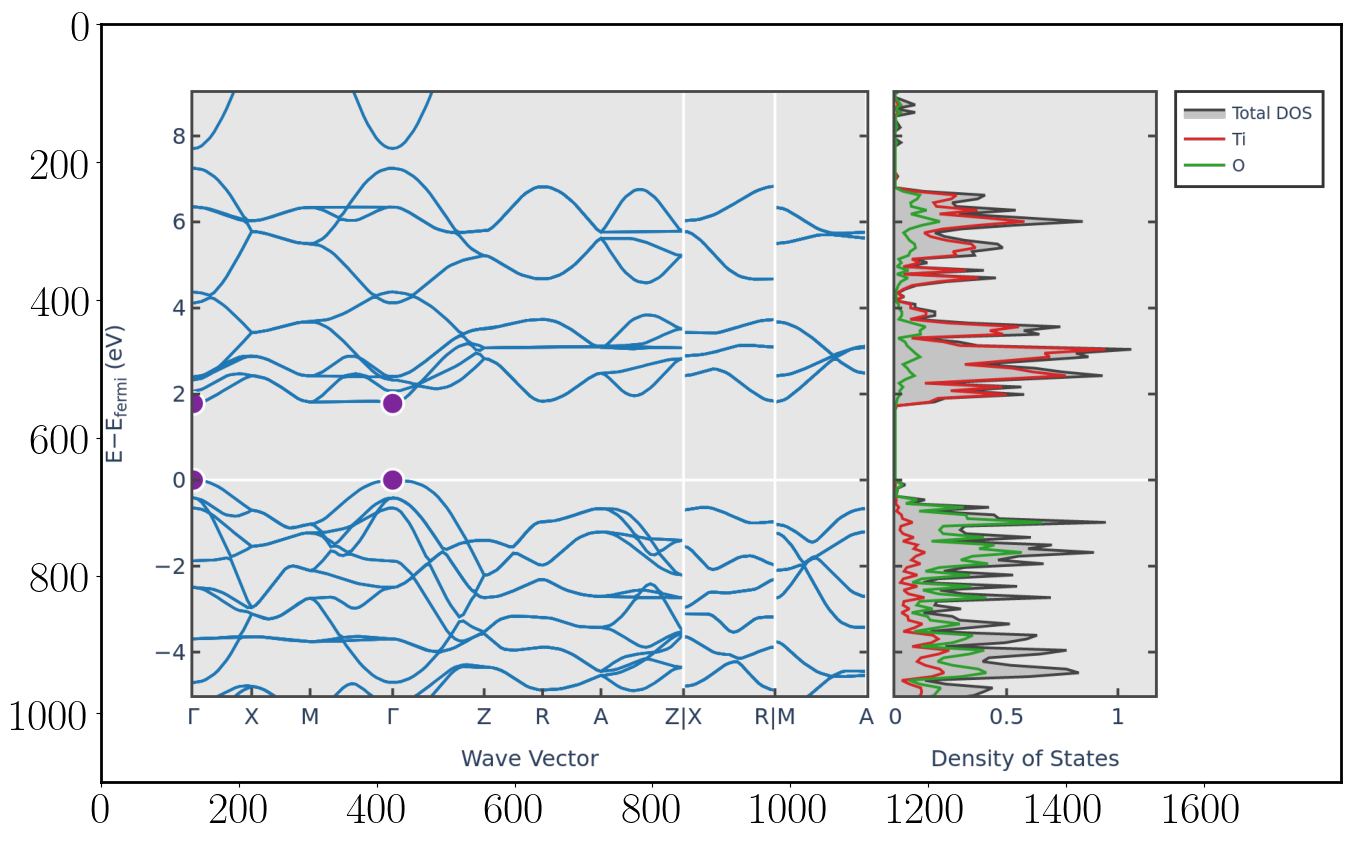

In [9]:
url="https://materialsproject-build.s3.amazonaws.com/images/electronic_structures/mp-2657.png"
img = imread(url)
plt.imshow(img)

## Calculate and plot equation of state

  LIGHTNING RUNTIME :    27.8381420000000      [sec] 
The energy for cell factor 0.900 is -1925.523
The energy for cell factor 0.929 is -1931.312
The energy for cell factor 0.957 is -1935.098
The energy for cell factor 0.986 is -1937.404
The energy for cell factor 1.014 is -1938.513
The energy for cell factor 1.043 is -1938.703
The energy for cell factor 1.071 is -1938.239
The energy for cell factor 1.100 is -1937.276


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Full Formula (Ti4 O8)
Reduced Formula: TiO2
abc   :   5.469502   5.469505   5.469505
angles: 114.491261 107.018456 107.023725
pbc   :       True       True       True
Sites (12)
  #  SP            a         b          c    magmom
---  ----  ---------  --------  ---------  --------
  0  Ti     0.499998  0.749993   0.749996        -0
  1  Ti     0.500003  0.250004   0.250002        -0
  2  Ti    -0         1e-06      0.500001         0
  3  Ti    -1e-06     0.500002   2e-06            0
  4  O      0.304321  0.304625   0.500303         0
  5  O      0.195242  0.249581   0.945661        -0
  6  O      0.304321  0.804018  -0.000303         0
  7  O      0.80392   0.249581   0.554339         0
  8  O      0.19608   0.750418   0.44566          0
  9  O      0.804758  0.750417   0.054338        -0
 10  O      0.69568   0.195983   0.000304        -0
 11  O      0.695679  0.695375   0.499698         0


Retrieving EOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

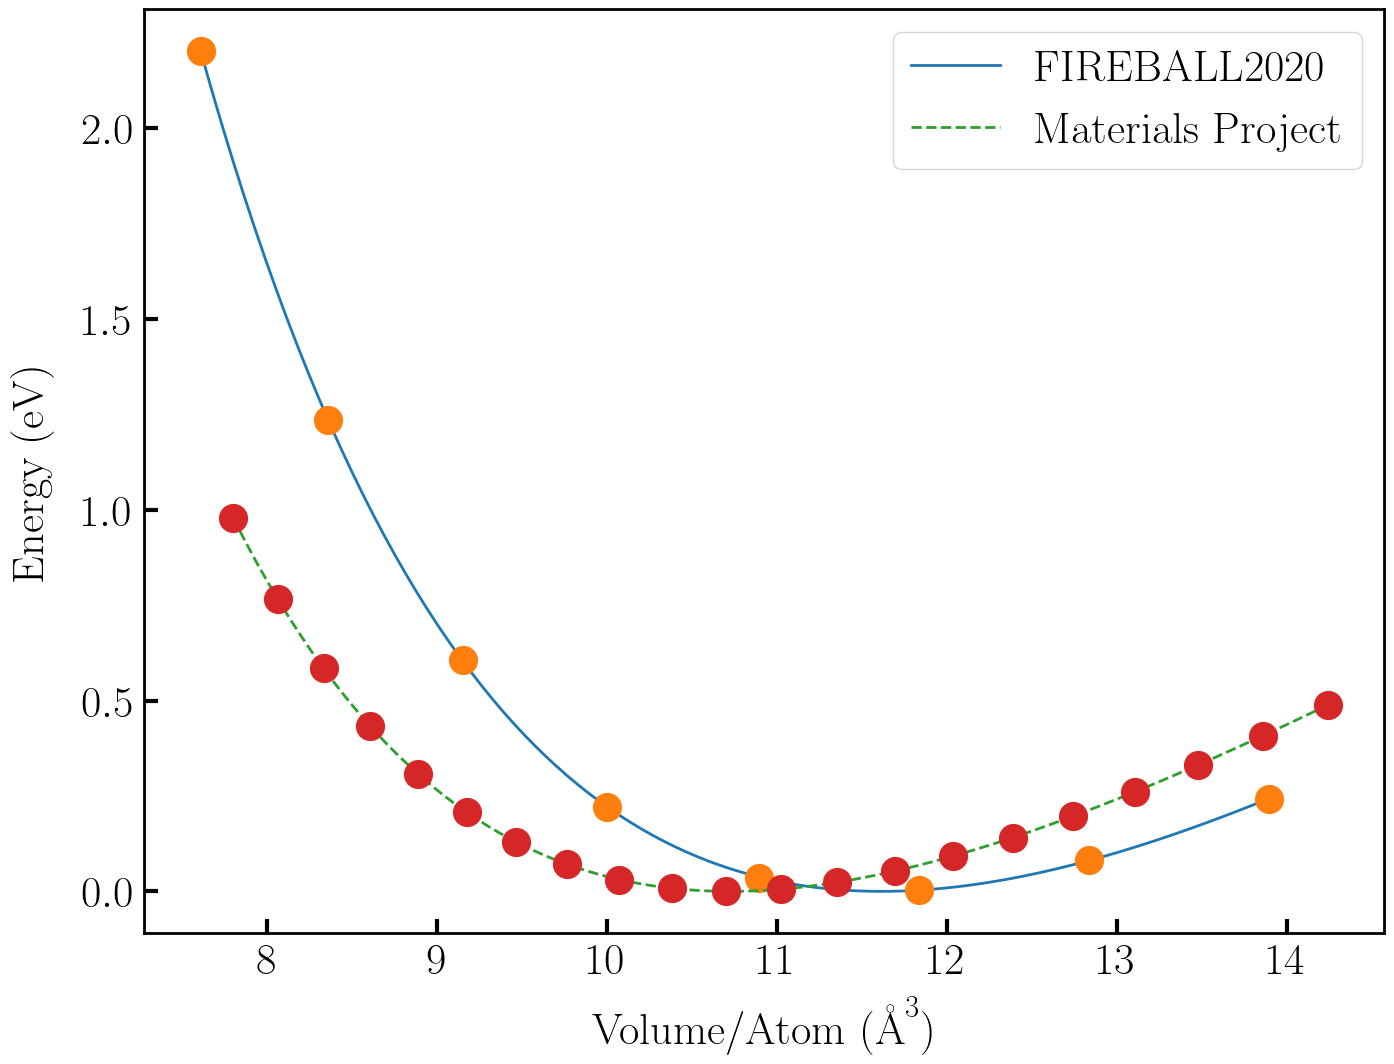

In [10]:
cell_factors = np.linspace(0.9, 1.1, 8)

# EOS from fireball
bm_McWEDA.calc_eos_data(cell_factors, kwargs_update_eos)
script_dir = os.getcwd()
npzfile = np.load( script_dir + '/bench_eos_data.npz' )
volumes, energies = npzfile['volumes'], npzfile['energies']
ax_eos = bm_McWEDA.plot_eos(volumes, energies, 
                            shiftmin = True, color='C0', mcolor='C1', ls='-',
                            label='FIREBALL2020')

# EOS from materials-project
bm_McWEDA = Benchmark(
        mp_apikey = "R2rD2kAJuqQq5Xk7m66gt0unrcVAVsVY",
        mater_id = "mp-2657",
        firerun = '/users/lewis/thunder2022/lightning/tests/02.TiO2/lightning.x',
        Fdata_path = '/users/lewis/thunder2022/lightning/tests/02.TiO2/Fdata',
        work_path = '/users/lewis/thunder2022/lightning/tests/02.TiO2',
        )
volumes, energies = bm_McWEDA.eos_from_matproj()
ax_eos = bm_McWEDA.plot_eos(volumes, energies, ax=ax_eos, 
                            shiftmin = True, color='C2', mcolor='C3', ls='--',
                            label = 'Materials Project')
bm_McWEDA.savefig_eos('eos_mp-2657.png')

In [11]:
# clean last run result
!./clean.com

# TiO2 - Anatase

## Set benchmark systems

In [12]:
kwargs_update_scf = { 'kpt_size': [7, 7, 11], }
kwargs_update_eos = { 'kpt_size': [7, 7, 11], }

bm_McWEDA = Benchmark(
#       mp_apikey = "R2rD2kAJuqQq5Xk7m66gt0unrcVAVsVY",
#       mater_id = "mp-390",
        structure_inpf="/users/lewis/thunder2022/lightning/tests/02.TiO2/anatase.poscar",
        structure_fmt="vasp",
        firerun = '/users/lewis/thunder2022/lightning/tests/02.TiO2/lightning.x',
        Fdata_path = '/users/lewis/thunder2022/lightning/tests/02.TiO2/Fdata',
        work_path = '/users/lewis/thunder2022/lightning/tests/02.TiO2',
        )

## Plot Brillouin zone

Cell from bench import:  Cell([[-1.89126983995882, 1.89126983995882, 4.80751078740062], [1.89126983995882, -1.89126983995882, 4.80751078740062], [1.89126983995882, 1.89126983995882, -4.80751078740062]])
BCT(a=3.78254, c=9.61502)
  Variant name: BCT2
  Special point names: GNPSS1XYY1Z
  Default path: GXYSGZS1NPY1Z,XP

  Special point coordinates:
    G   0.0000  0.0000  0.0000
    N   0.0000  0.5000  0.0000
    P   0.2500  0.2500  0.2500
    S  -0.2887  0.2887  0.2887
    S1  0.2887  0.7113 -0.2887
    X   0.0000  0.0000  0.5000
    Y  -0.0774  0.0774  0.5000
    Y1  0.5000  0.5000 -0.0774
    Z   0.5000  0.5000 -0.5000



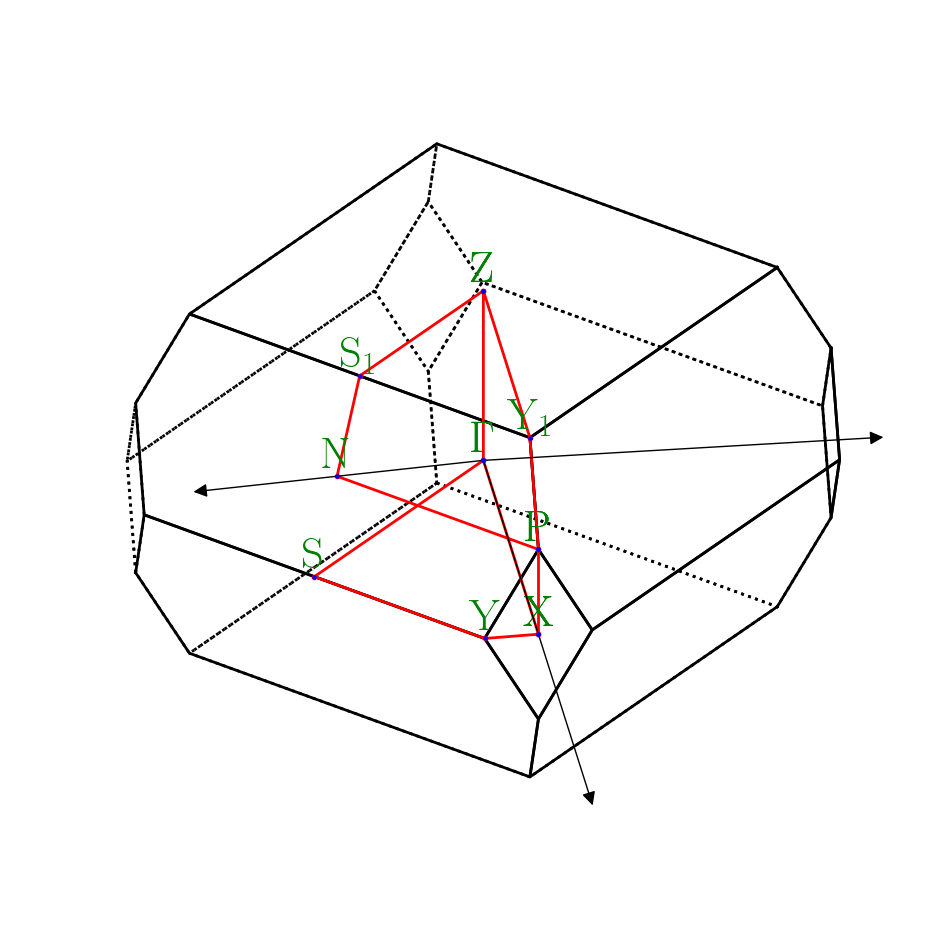

<Axes3DSubplot: >

In [13]:
atoms = bm_McWEDA.ase_atoms
print("Cell from bench import: ", atoms.cell)
lat = atoms.cell.get_bravais_lattice()
print(lat.description())
lat.plot_bz(show=True)

## Calculate and plot band structure

  LIGHTNING RUNTIME :    25.7977460000000      [sec] 
  LIGHTNING RUNTIME :    4.67606000000000      [sec] 
Gap: 3.560 eV
Transition (v -> c):
  (s=0, k=86, n=15, [0.73, 0.73, -0.00]) -> (s=0, k=33, n=16, [0.00, 0.00, 0.00])


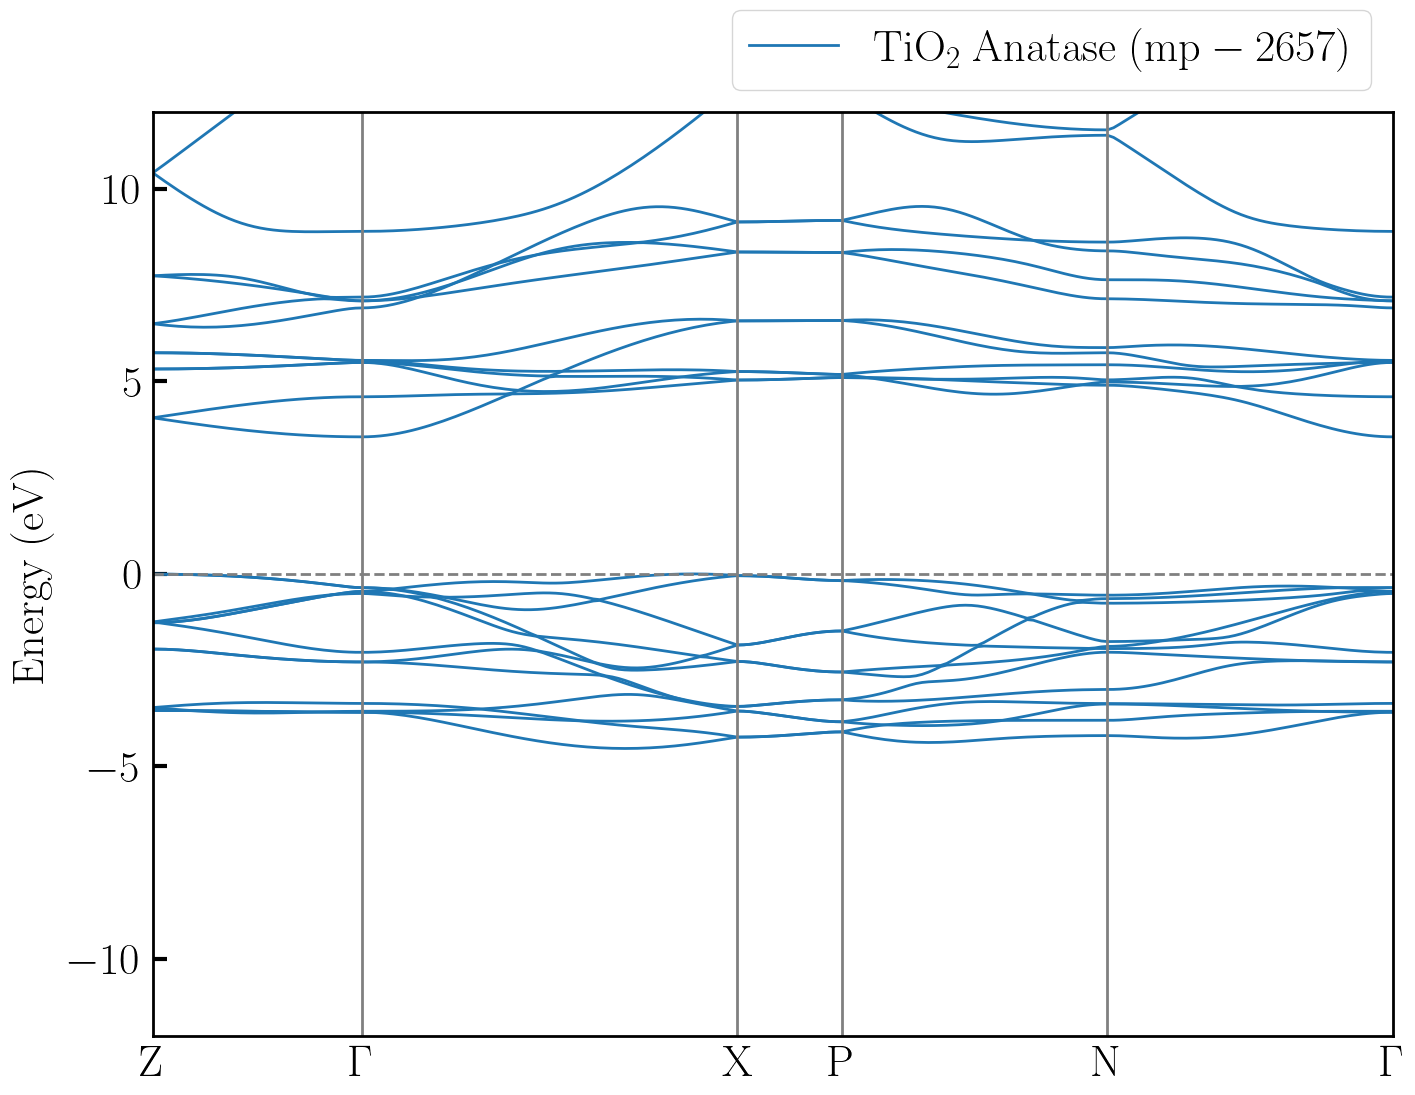

In [14]:
energy_range = (-12., 12.)

bm_McWEDA.scf(kwargs_update_scf)
bm_McWEDA.calc_band(path ="ZGXPNG", npoints = 200, fermi_ref = 'cbmax')
         
ax_band = bm_McWEDA.plot_band(energy_range = energy_range, 
                              replace_kpoint_labels = {'G':'$\Gamma$',},
                              color='C0',
                              label='$\mathrm{TiO_{2} \; Anatase \; (mp-2657)}$')
bm_McWEDA.savefig_band('bandstructure_mp-390.png')

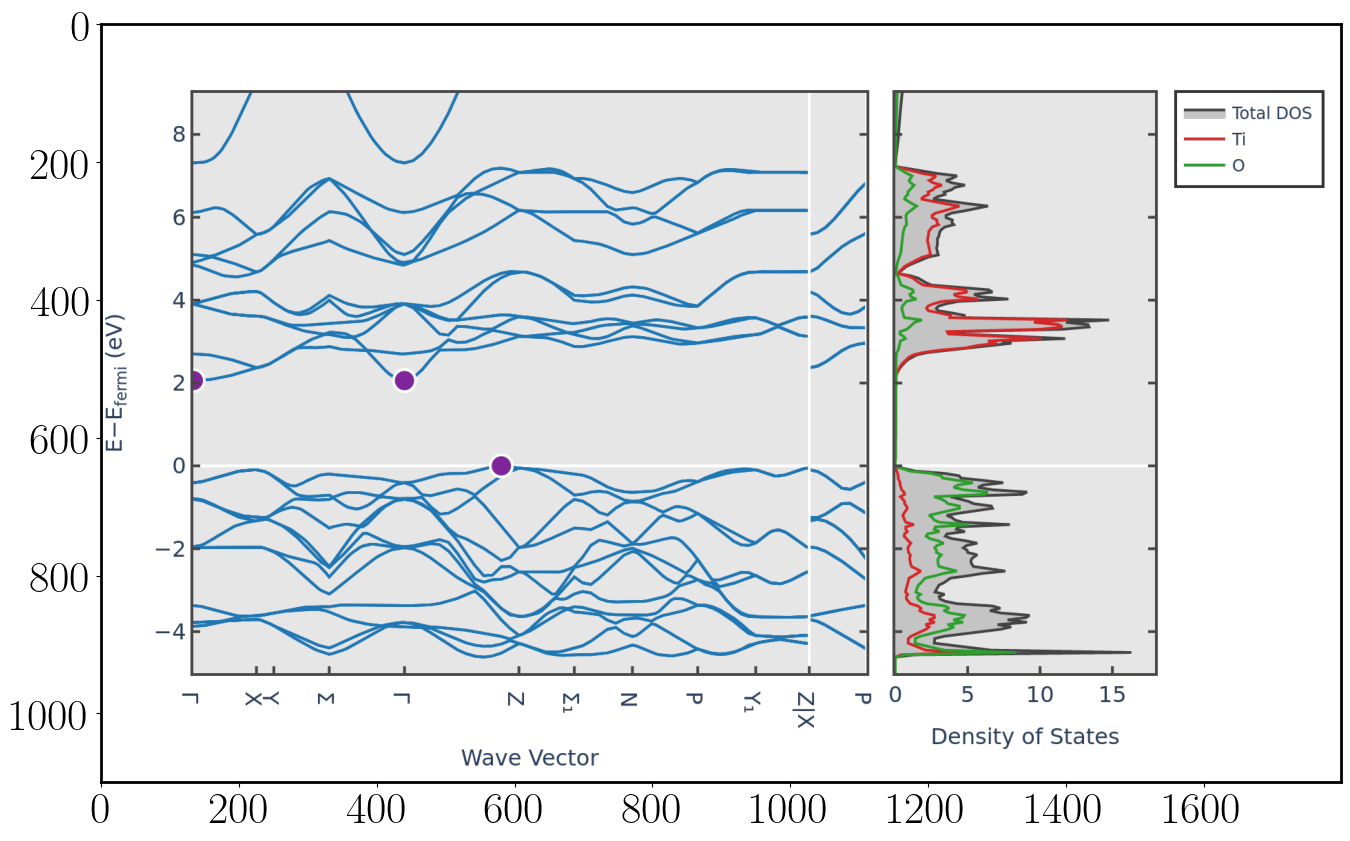

In [15]:
url="https://materialsproject-build.s3.amazonaws.com/images/electronic_structures/mp-390.png"
img = imread(url)
plt.imshow(img)

## Calculate and plot equation of state

  LIGHTNING RUNTIME :    83.8251050000000      [sec] 
The energy for cell factor 0.900 is -1925.689
The energy for cell factor 0.929 is -1931.588
The energy for cell factor 0.957 is -1935.337
The energy for cell factor 0.986 is -1937.422
The energy for cell factor 1.014 is -1938.275
The energy for cell factor 1.043 is -1938.247
The energy for cell factor 1.071 is -1937.618
The energy for cell factor 1.100 is -1936.629


Retrieving SummaryDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Full Formula (Ti2 O4)
Reduced Formula: TiO2
abc   :   3.782540   3.782540   5.501451
angles: 110.107144 110.107133  89.999979
pbc   :       True       True       True
Sites (6)
  #  SP           a         b         c    magmom
---  ----  --------  --------  --------  --------
  0  Ti    0.875     0.625     0.25            -0
  1  Ti    0.125     0.375     0.75            -0
  2  O     0.332153  0.582153  0.164304        -0
  3  O     0.082153  0.832153  0.664304        -0
  4  O     0.917847  0.167847  0.335696        -0
  5  O     0.667847  0.417847  0.835696        -0


Retrieving EOSDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

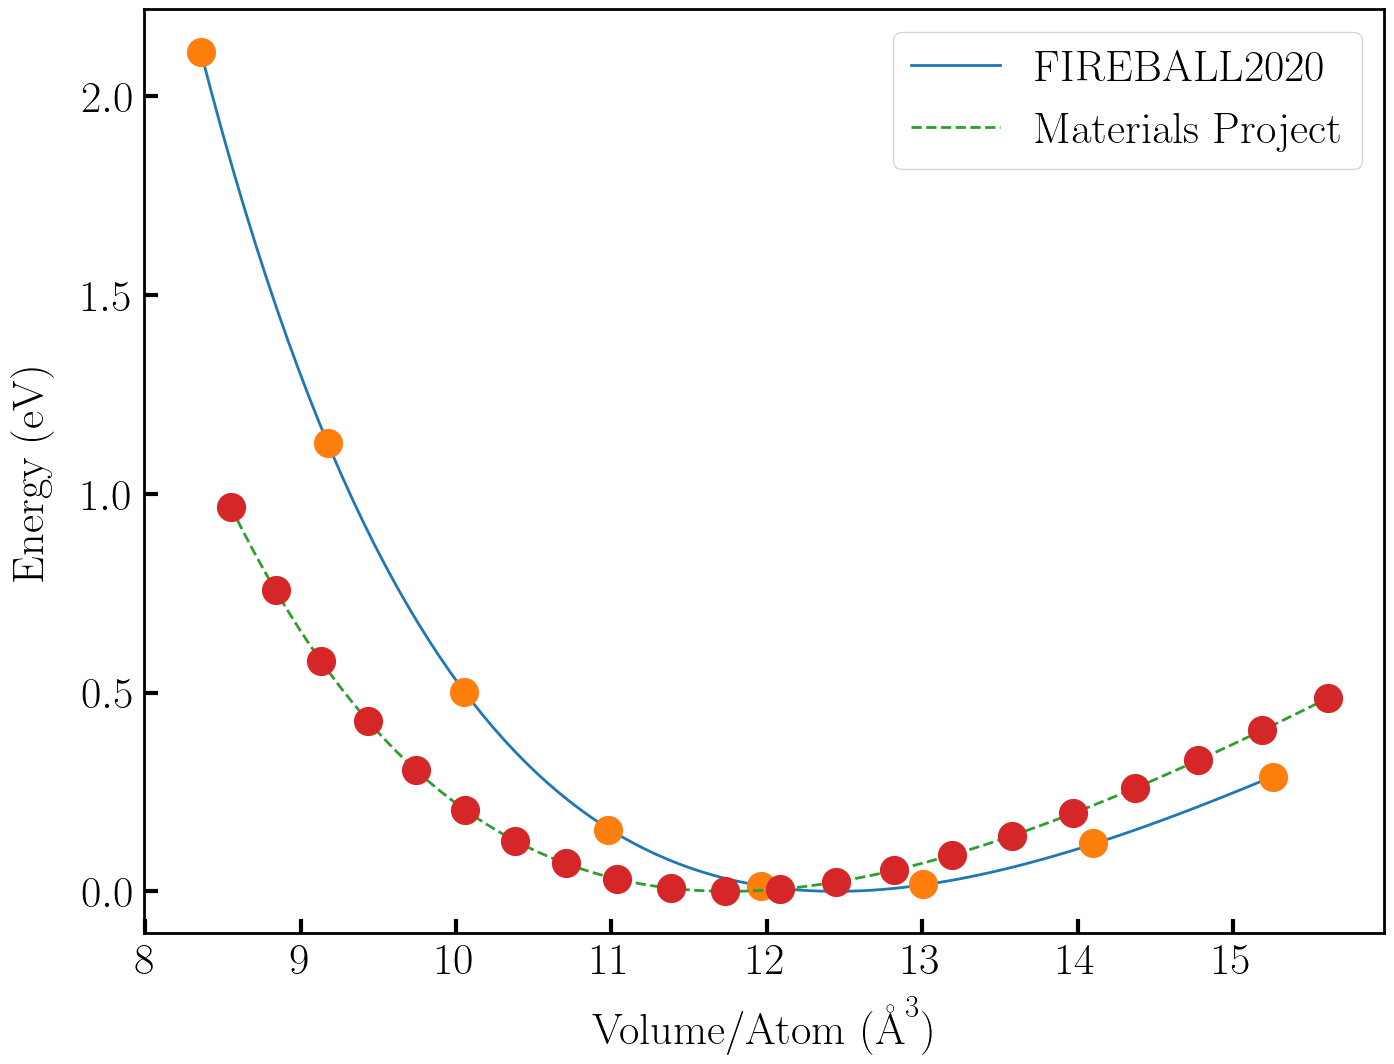

In [16]:
cell_factors = np.linspace(0.9, 1.1, 8)

# EOS from fireball
bm_McWEDA.calc_eos_data(cell_factors, kwargs_update_eos)
script_dir = os.getcwd()
npzfile = np.load( script_dir + '/bench_eos_data.npz' )
volumes, energies = npzfile['volumes'], npzfile['energies']
ax_eos = bm_McWEDA.plot_eos(volumes, energies, 
                            shiftmin = True, color='C0', mcolor='C1', ls='-',
                            label='FIREBALL2020')

# EOS from materials-project
bm_McWEDA = Benchmark(
        mp_apikey = "R2rD2kAJuqQq5Xk7m66gt0unrcVAVsVY",
        mater_id = "mp-390",
        firerun = '/users/lewis/thunder2022/lightning/tests/02.TiO2/lightning.x',
        Fdata_path = '/users/lewis/thunder2022/lightning/tests/02.TiO2/Fdata',
        work_path = '/users/lewis/thunder2022/lightning/tests/02.TiO2',
        )
volumes, energies = bm_McWEDA.eos_from_matproj()
ax_eos = bm_McWEDA.plot_eos(volumes, energies, ax=ax_eos, 
                            shiftmin = True, color='C2', mcolor='C3', ls='--',
                            label = 'Materials Project')
bm_McWEDA.savefig_eos('eos_mp-390.png')